# Task-03: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioural data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository

# Import Modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Dataset

In [14]:
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Dataset Understanding 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.shape

(11162, 17)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [9]:
df.dtypes.value_counts()

object    10
int64      7
dtype: int64

In [10]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [11]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [12]:
df['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [13]:
df['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [14]:
convert={"job":{"management":1,"blue-collar":2,"technician":3,"admin.":4,"services":5,"retired":6,"self-employed":7,"student":8,"unemployed":9,"entrepreneur":10,"housemaid":11,"unknown":12},
         "marital":{"single":0,"married":1,"divorced":2},
    "deposit":{"yes":1,"no":0},
        "poutcome":{"success":1,"failure":0,"other":2,"unknown":3},
        "contact":{"cellular":0,"telephone":1,"unknown":2},
        "loan":{"yes":1,"no":0},
         "pdays":{"-1":0},
         "housing":{"yes":1,"no":0},
         "default":{"yes":1,"no":0},
        "education":{"secondary":1,"primary":0,"tertiary":2,"unknown":3},
        "month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
        }

# Data Cleaning and Data Processing

In [15]:
#Check Total no of Duplicate Values
df.duplicated().sum()

0

In [16]:
#Check No of Null and Missing Values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Extracting Numerical and Categorical Columns

In [17]:
categorical_columns=df.select_dtypes(include='object').columns
print(categorical_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


In [18]:
numerical_columns=df.select_dtypes(include='object').columns
print(numerical_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


In [20]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,3.816879,0.800663,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,6.190826,371.993818,2.508421,51.330407,0.832557,2.429941,0.473840
std,11.913369,2.749880,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,2.572792,347.128386,2.722077,108.758282,2.292007,1.047467,0.499338
min,18.000000,1.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,0.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,5.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,5.000000,1.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,12.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


In [21]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,4,1,1,0,2343,1,0,2,5,5,1042,1,-1,0,3,1
1,56,4,1,1,0,45,0,0,2,5,5,1467,1,-1,0,3,1
2,41,3,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
3,55,5,1,1,0,2476,1,0,2,5,5,579,1,-1,0,3,1
4,54,4,1,2,0,184,0,0,2,5,5,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,0,0,0,1,1,0,0,20,4,257,1,-1,0,3,0
11158,39,5,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,3,0,1,0,29,0,0,0,19,8,156,2,-1,0,3,0
11160,43,3,1,1,0,0,0,1,0,8,5,9,2,172,5,0,0


# Data Visualization

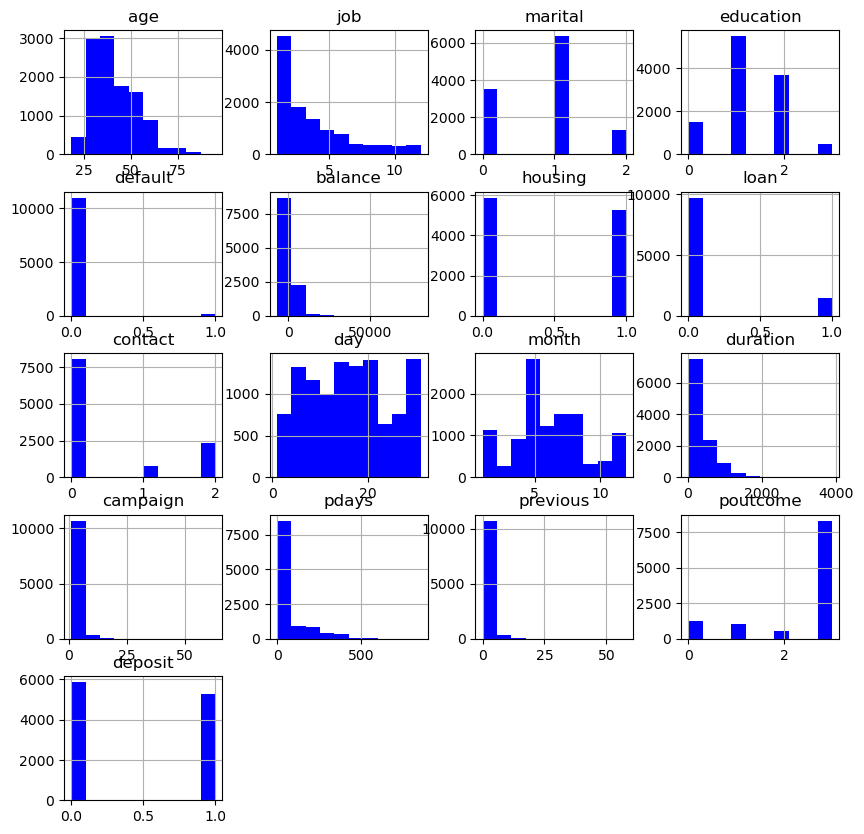

In [23]:
#Visualizing Columns Using histplot
df.hist(figsize=(10,10),color='Blue')
plt.show()

In [24]:
!pip install pydotplus
!pip install graphviz
from sklearn.tree import export_graphviz 
from six import StringIO 
from IPython.display import Image
import pydotplus
import graphviz

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


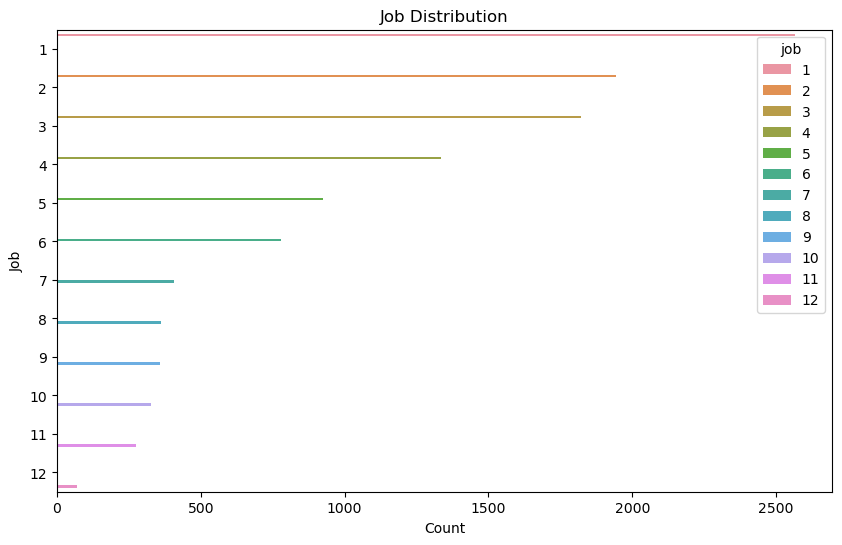

In [25]:
#Visualizing Columns Using countplot
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=df, hue='job')
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

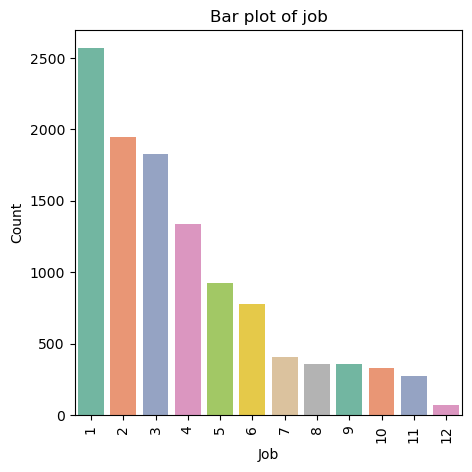

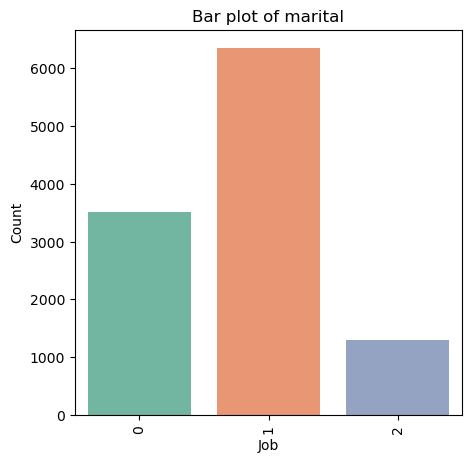

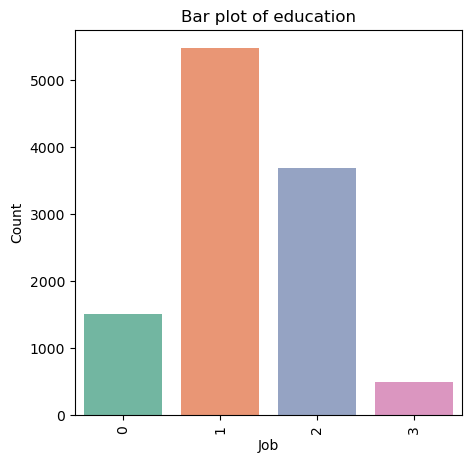

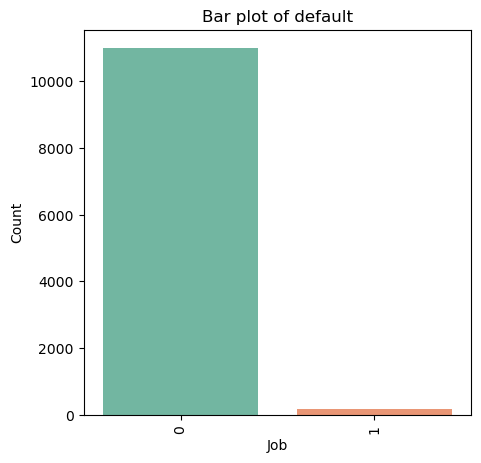

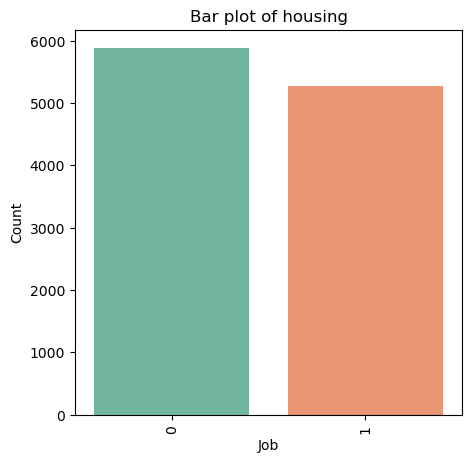

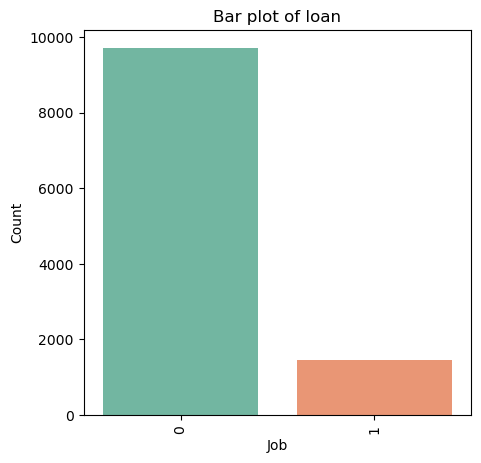

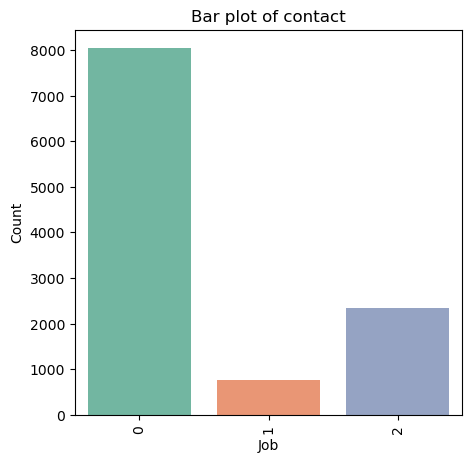

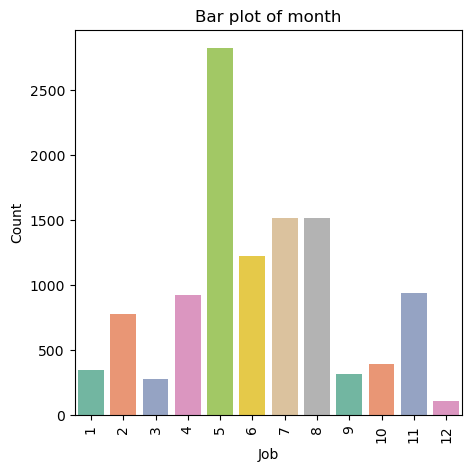

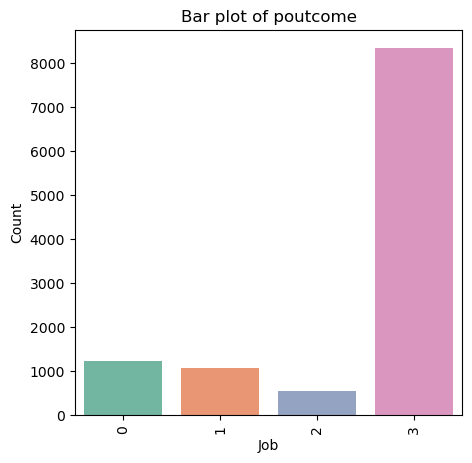

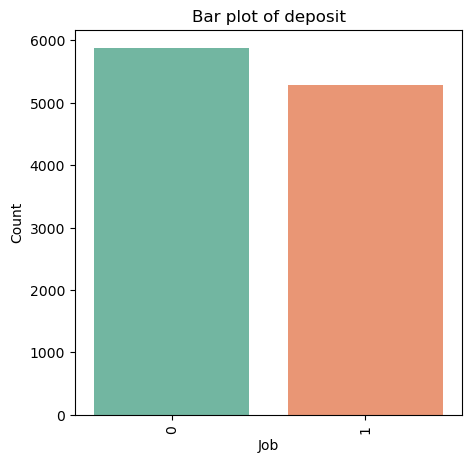

In [26]:
#Visualizing Categorical Data using Barplot
for job in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x=job,data=df,palette="Set2")
    plt.title(f'Bar plot of {job}')
    plt.xlabel('Job')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

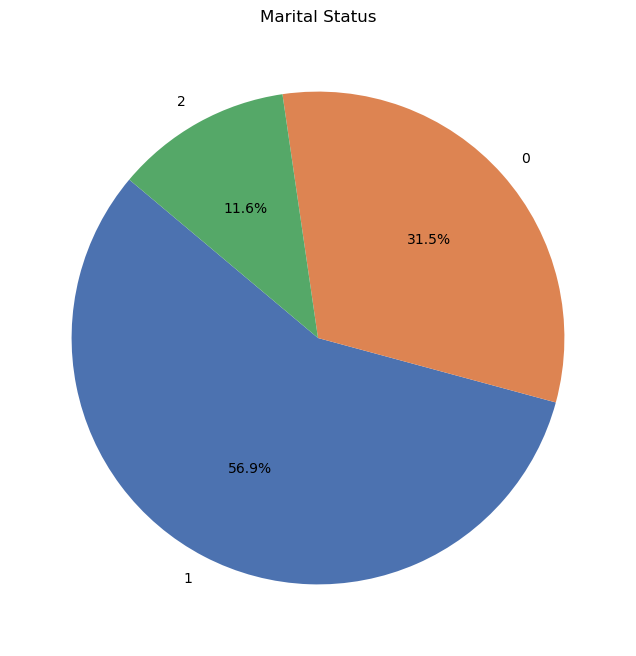

In [27]:
#  pie chart
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=sns.color_palette('deep'), startangle=140)
plt.title('Marital Status')
plt.show()

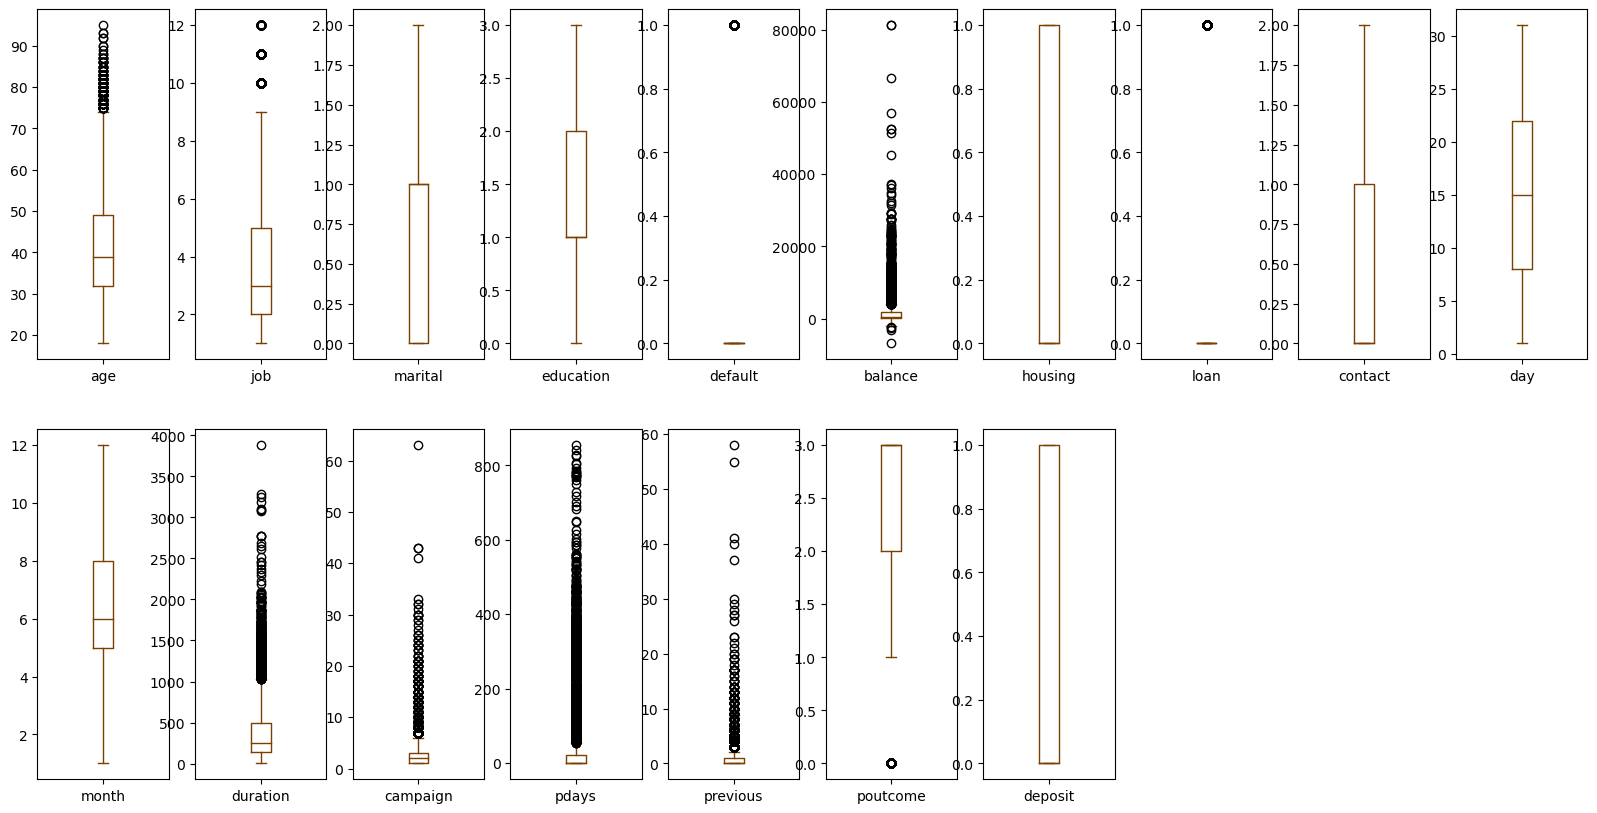

In [32]:
#Checking Outliers 
df.plot(kind='box', subplots=True, layout=(2,10),figsize=(20,10),color='#7b3f00')
plt.show()

In [56]:
#Removing Outliers
column=df[['age','campaign','duration']]
q1=np.quantile(column,0.25,method='midpoint')
q3=np.quantile(column,0.75,method='midpoint')
iqr =q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

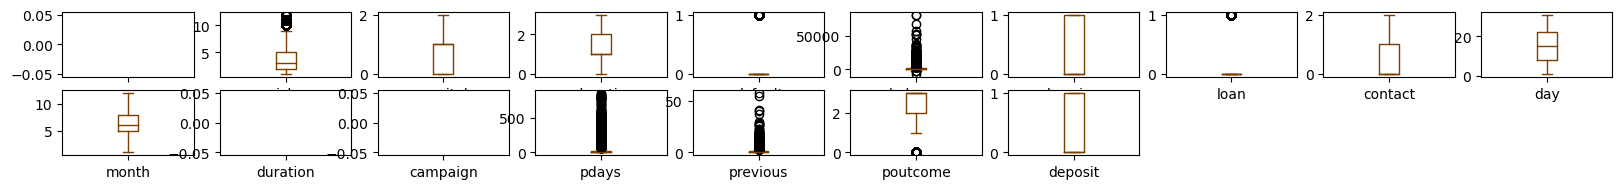

In [59]:
df.plot(kind='box', subplots=True, layout=(10,10),figsize=(20,10),color='#7b3f00')
plt.show()

In [100]:
my_df=df.select_dtypes(exclude=[object])
my_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,NaN,1.000000,0.015342,-0.151641,0.003148,0.002363,-0.138339,-0.030693,-0.004858,-0.000921,0.002673,NaN,NaN,-0.008428,-0.007524,-0.001904,0.041143
marital,NaN,0.015342,1.000000,-0.125845,0.014691,0.002138,0.036345,0.062029,0.060456,0.003642,0.053978,NaN,NaN,-0.031200,-0.031281,0.039329,-0.067610
education,NaN,-0.151641,-0.125845,1.000000,-0.010709,0.051728,-0.109168,-0.073154,-0.132540,0.016759,0.036550,NaN,NaN,0.025165,0.022427,-0.054954,0.095948
default,NaN,0.003148,0.014691,-0.010709,1.000000,-0.060954,0.011076,0.076434,0.035709,0.017342,0.006561,NaN,NaN,-0.036282,-0.035273,0.048311,-0.040680
balance,NaN,0.002363,0.002138,0.051728,-0.060954,1.000000,-0.077092,-0.084589,-0.027295,0.010467,0.063818,NaN,NaN,0.017411,0.030805,-0.032993,0.081129
housing,NaN,-0.138339,0.036345,-0.109168,0.011076,-0.077092,1.000000,0.076761,0.226392,-0.014770,-0.117996,NaN,NaN,0.064497,-0.000840,-0.004029,-0.203888
loan,NaN,-0.030693,0.062029,-0.073154,0.076434,-0.084589,0.076761,1.000000,0.006829,0.017269,0.005308,NaN,NaN,-0.030416,-0.022668,0.043704,-0.110580
contact,NaN,-0.004858,0.060456,-0.132540,0.035709,-0.027295,0.226392,0.006829,1.000000,0.007943,-0.127822,NaN,NaN,-0.227785,-0.169919,0.270484,-0.249847
day,NaN,-0.000921,0.003642,0.016759,0.017342,0.010467,-0.014770,0.017269,0.007943,1.000000,0.060431,NaN,NaN,-0.077232,-0.058981,0.087725,-0.056326


In [39]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]


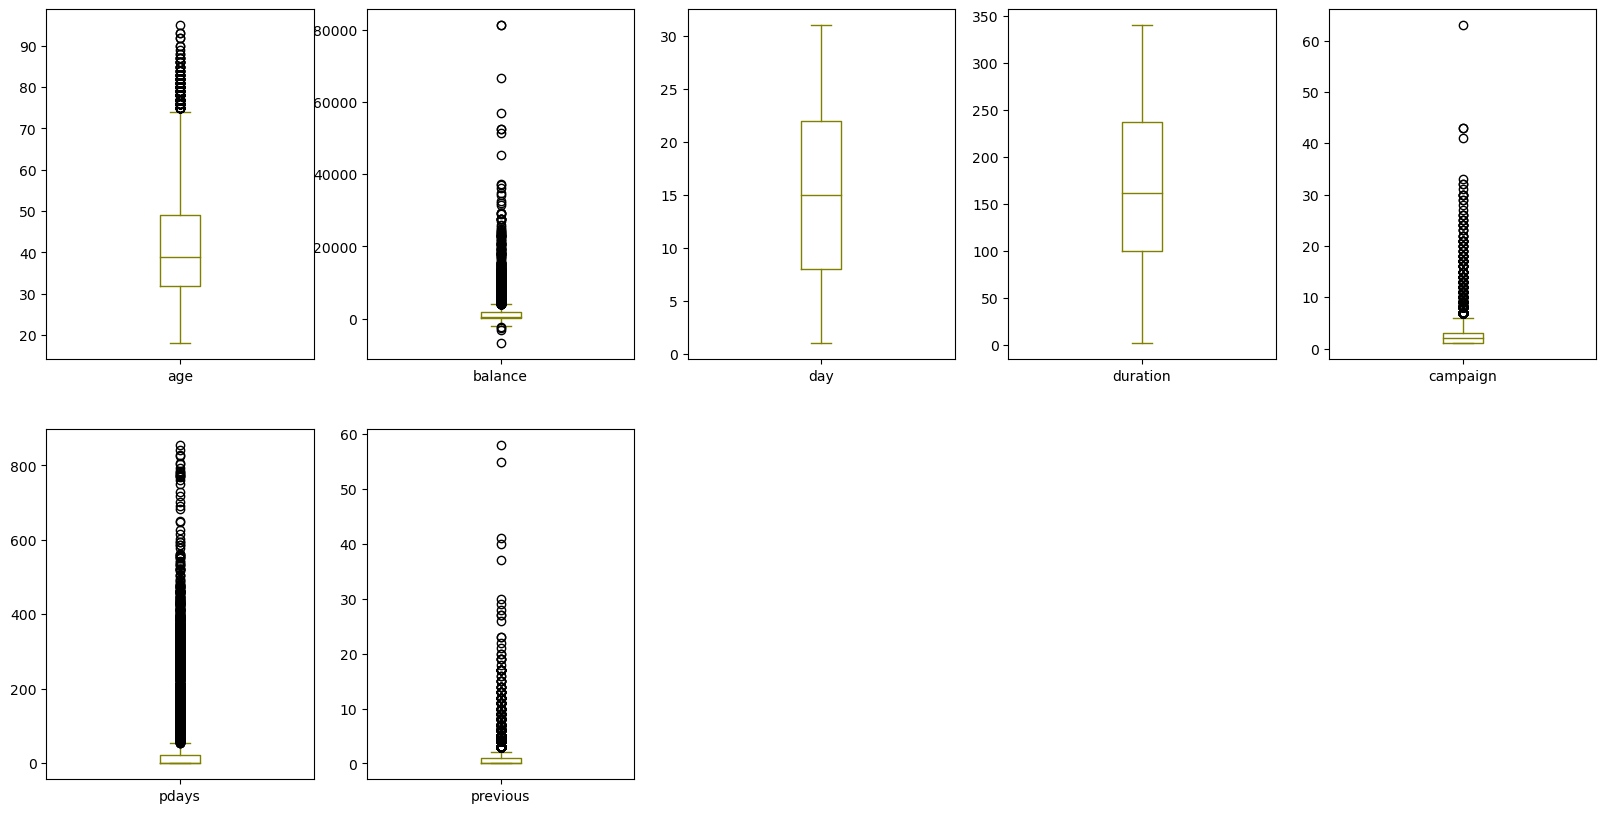

In [40]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

# Label Encoding

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [97]:
df["job"] = le.fit_transform(df["job"])
df["marital"] = le.fit_transform(df["marital"])
df["education"] = le.fit_transform(df["education"])
df["default"] = le.fit_transform(df["default"])
df["loan"] = le.fit_transform(df["loan"])
df["contact"] = le.fit_transform(df["contact"])
df["poutcome"] = le.fit_transform(df["poutcome"])
df["housing"] = le.fit_transform(df["housing"])
df["month"] = le.fit_transform(df["month"])

In [99]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,NaN,3,1,1,0,2343,1,0,2,5,4,NaN,NaN,-1,0,3,1
1,NaN,3,1,1,0,45,0,0,2,5,4,NaN,NaN,-1,0,3,1
2,NaN,2,1,1,0,1270,1,0,2,5,4,NaN,NaN,-1,0,3,1
3,NaN,4,1,1,0,2476,1,0,2,5,4,NaN,NaN,-1,0,3,1
4,NaN,3,1,2,0,184,0,0,2,5,4,NaN,NaN,-1,0,3,1


In [103]:
df.shape

(11162, 17)

C:\Users\Sumitha\AppData\Local\Temp\ipykernel_13308\2235212194.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Set3', annot=True)


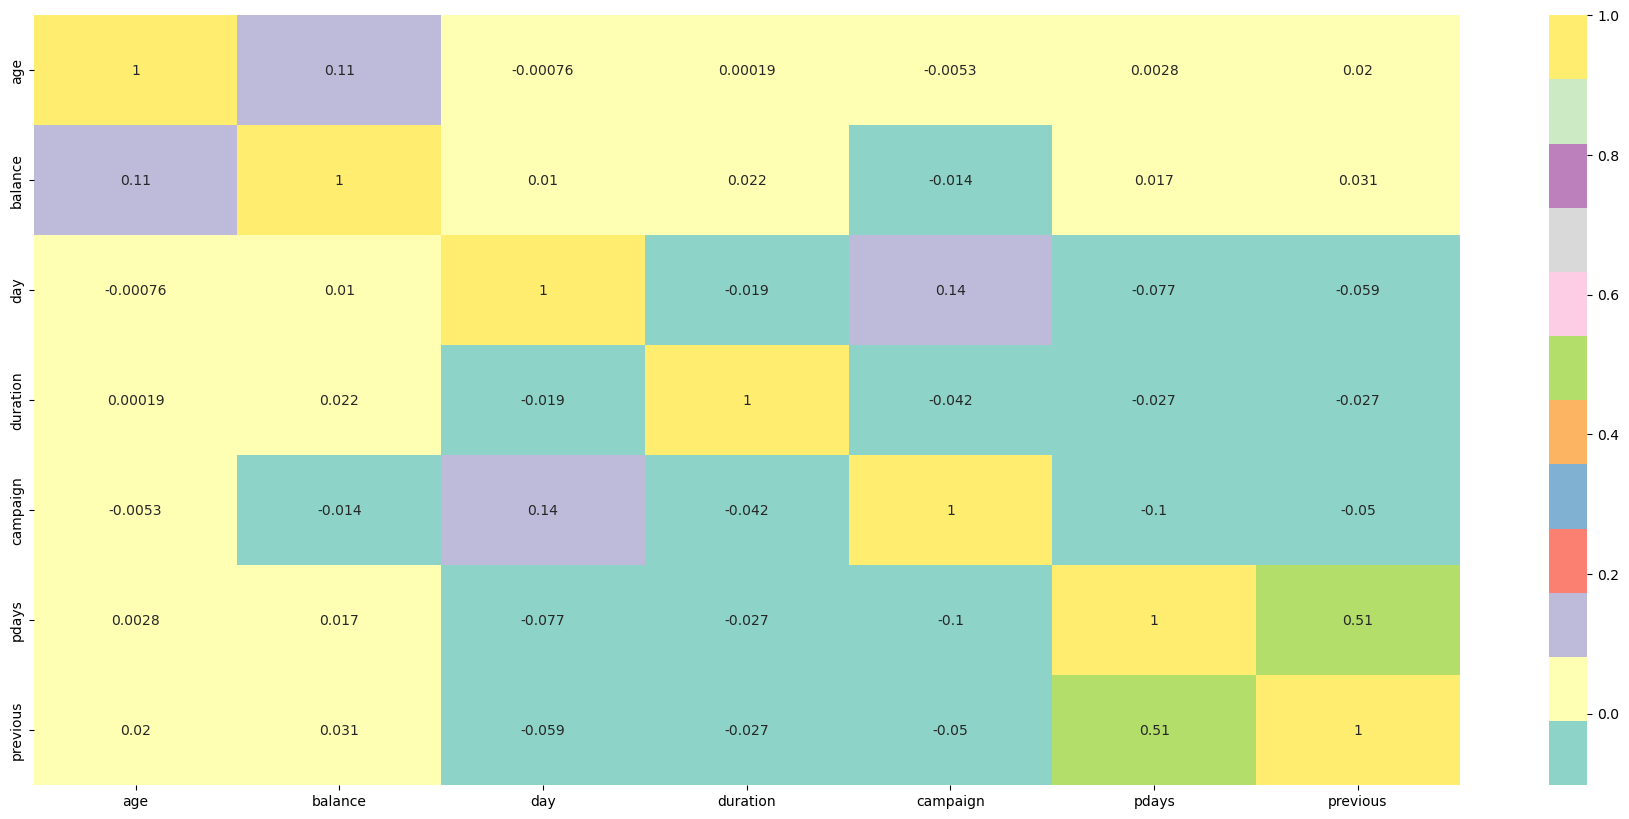

In [33]:
plt.figure(figsize=(23,10))
sns.heatmap(df.corr(), cmap='Set3', annot=True)
plt.show()

# Model building - Decision Tree Classifier

In [18]:
#Importing Decision Tree Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,339,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,339,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,339,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,339,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,339,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3,0
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3,0
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3,0
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0,0


In [44]:
df_encoded['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [47]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(11162, 16)
(11162,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8371, 16)
(2791, 16)
(8371,)
(2791,)


In [51]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [52]:
#Plotting Decision Tree
from sklearn.tree import plot_tree
cn=['No','Yes']
fn=x_train.columns
print(cn)
print(fn)

['No', 'Yes']
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [53]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [54]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,NaN,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,NaN,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,NaN,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,NaN,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,NaN,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257.0,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83.0,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156.0,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9.0,2,172,5,failure,no


In [55]:
mscore(dt)

Training Score 0.8058774339983276
Testing Score 0.7835901110713006


In [56]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 0 1 0]


In [57]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.7835901110713006
Confusion Matrix
 [[1047  410]
 [ 194 1140]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.72      0.78      1457
           1       0.74      0.85      0.79      1334

    accuracy                           0.78      2791
   macro avg       0.79      0.79      0.78      2791
weighted avg       0.79      0.78      0.78      2791



In [58]:
from sklearn.tree import plot_tree
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


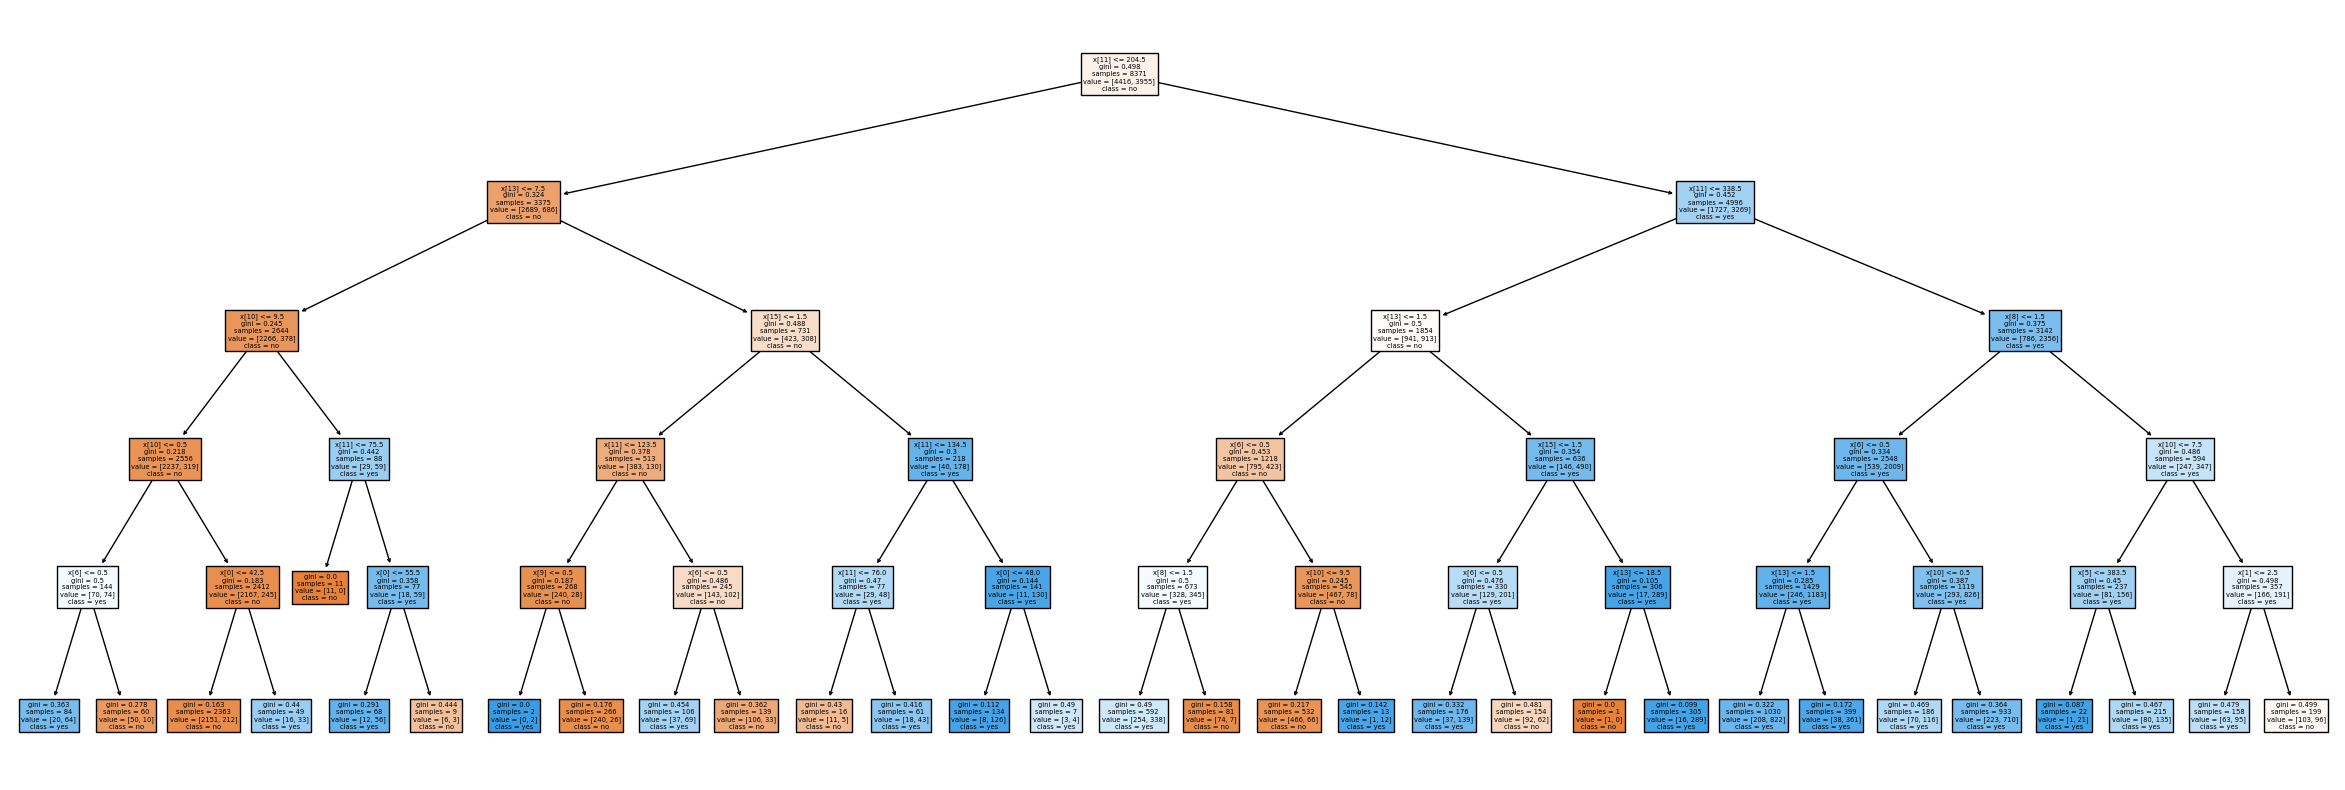

In [59]:
plt.figure(figsize=(30,10))
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [60]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [61]:
mscore(dt1)

Training Score 0.7675307609604587
Testing Score 0.7642422070942314


In [62]:
ypred_dt1 = dt1.predict(x_test)

In [63]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.7642422070942314
Confusion Matrix
 [[1144  313]
 [ 345  989]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1457
           1       0.76      0.74      0.75      1334

    accuracy                           0.76      2791
   macro avg       0.76      0.76      0.76      2791
weighted avg       0.76      0.76      0.76      2791



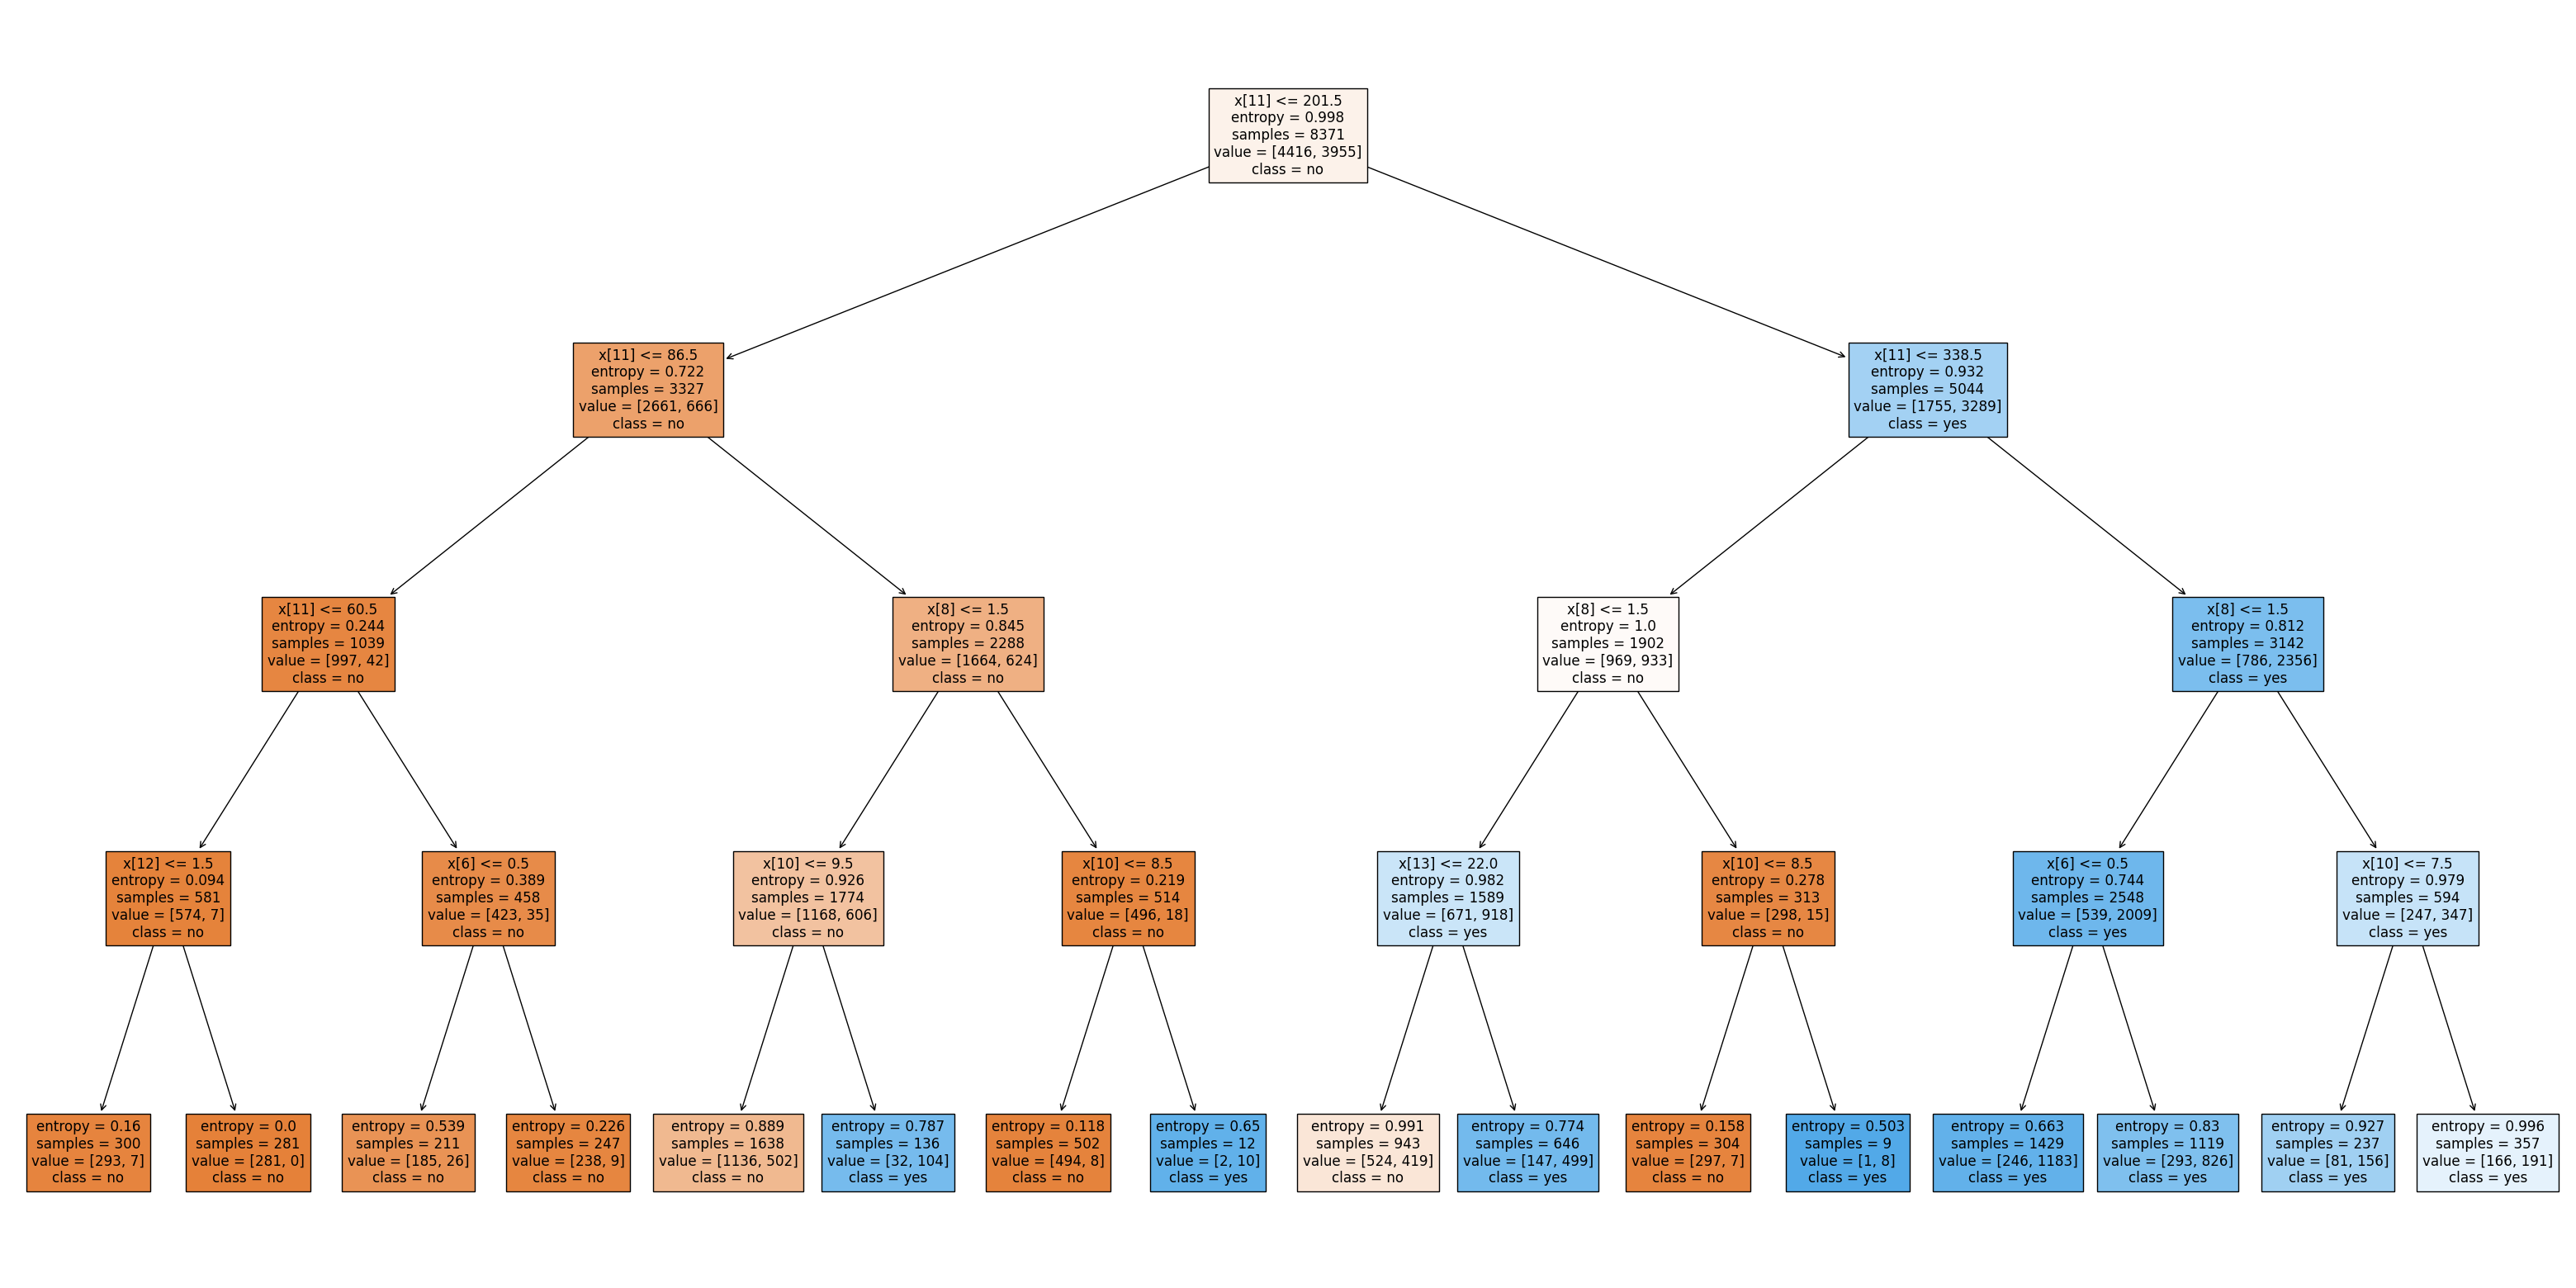

In [64]:
plt.figure(figsize=(40,20))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()